# Praktikum

Dalam bab ini, praktikan diharapkan memahami implementasi model ELM. Praktikan harus mampu membangun model ELM dan Backpropagation, serta melakukan analisis dan perbandingan hasil dari kedua model tersebut.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

Dataset yang digunakan adalah dataset MNIST yang memiliki 28x28 piksel gambar dan 10 label kelas.

In [ ]:
# !gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

# Bagian Baru

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Hapus semua kelas, kecuali kelas 2 dan 3
data = df[(df['label'] == 2) | (df['label'] == 3)]
data.reset_index(drop=True, inplace=True)
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


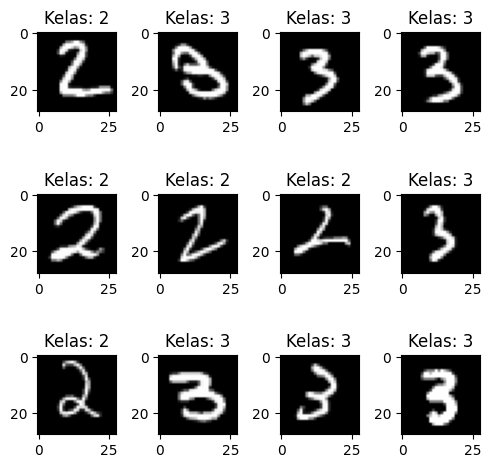

In [ ]:
selected = data.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [ ]:
W = np.random.uniform(-.1, .1, (10, len(X[0])))
print(W)

[[-0.0279665   0.09631577  0.04160556 ...  0.07927002  0.03893245
  -0.00094375]
 [ 0.02740229 -0.04288028  0.06651525 ...  0.05704883 -0.0589691
  -0.01866456]
 [ 0.03591047 -0.08494741  0.0148282  ...  0.00155002  0.08976685
   0.07869097]
 ...
 [ 0.06157973 -0.00106623  0.01287659 ...  0.09121949  0.09665524
  -0.02619485]
 [-0.06158869 -0.03379616 -0.07096894 ...  0.02034887  0.05978744
   0.06990171]
 [-0.05067866  0.06479466 -0.09229476 ... -0.04204742  0.07260264
  -0.00209807]]


### Fungsi *Training* ELM

Lengkapi kode dalam cell di bawah ini:

In [ ]:
def elm_fit(X, target, h, W=None):
    start_time = time.time()

    # Inisialisasi bobot acak jika tidak disediakan
    if W is None:
        W = np.random.uniform(-.1, .1, (h, len(X[0])))

    # Hitung keluaran hidden layer
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(Hinit))

    # Ubah urutan keluaran hidden layer
    Ht = H.T

    # Pseudo-invers dari keluaran transposed hidden layer
    Hp = np.linalg.inv(Ht @ H) @ Ht

    # Hitung bobot keluaran
    beta = Hp @ target

    # Hitung prediksi keluaran
    y = H @ beta

    # Hitung Mean Squared Error
    mse = sum(abs(y - target) / target) * 100 / len(target)

    # Hitung waktu eksekusi
    execution = time.time()- start_time
    print("Waktu eksekusi: %s detik" % execution)

    # Mengembalikan bobot, bobot keluaran, dan MSE
    return W, beta, mse

### Fungsi *Testing* ELM

Lengkapi kode dalam cell di bawah ini:

In [ ]:
def elm_predict(X, W, b, round_output=False):
    # Hitung keluaran layer output
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))

    # Hitung prediksi keluaran
    y = H @ b

    # Secara opsional membulatkan nilai keluaran
    if round_output:
        y = [int(round(x)) for x in y]

    # Mengembalikan hasil prediksi
    return y

### Implementasi Model ELM
Lengkapi kode dalam cell di bawah ini:

Ubahlah nilai pengaturan sebagai berikut:

a. Rasio data latih: 75% dan data uji: 25%

b. Jumlah hidden neuron: 10

In [ ]:
X = minmax_scale(data.drop('label', axis=1).astype('float32'))
Y = data['label'].astype('int')

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=42)

# Latih model ELM
W, b, mse = elm_fit(X_train, y_train, 10)
print('MSE:', mse)

# Buat prediksi pada set tes
output = elm_predict(X_test, W, b, round_output=True)

# Hitung dan cetak akurasi
accuracy = accuracy_score(output, y_test)
print('Output:', output)
print('True   :', y_test)
print('Accuracy:', accuracy)


Waktu eksekusi: 0.01390695571899414 detik
MSE: 11.58640391356537
Output: [2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3,

### Fungsi *Training* Backpropagation


In [ ]:
import numpy as np
def sig(x):
    return 1 / (1 + np.exp(-x))

def sigd(x):
    return sig(x) * (1 - sig(x))

def onehot_enc(lbl, min_val=0):
    mi = min(lbl)
    enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
    for i, x in enumerate(lbl):
      enc[i, x - mi] = 1
    return enc

def onehot_dec(enc, mi=0):
    return [np.argmax(e) + mi for e in enc]

In [ ]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
    start_time = time.time()
    np.random.seed(1)
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j+1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i+1]) for i in range(len(layer_conf) - 1)], dtype=object)
    dw = np.array([np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)], dtype=object)
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]
    epoch = 0
    mse = 1

    for i in range(0, len(n)-1):
        n[i][-1] = 1

    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0
        for r in range(len(X)):
            n[0][:-1] = X[r]

            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L-1], w[L-1])
                n[L][:len(nin[L])] = sig(nin[L])

            e = target[r] - n[-1]
            mse += sum(e ** 2)
            d[-1] = e * sigd(nin[-1])
            dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

            for L in range(len(layer_conf) - 1, 1, -1):
                din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
                d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
                dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

            w += dw
        mse /= len(X)

        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

    execution = time.time()- start_time
    print("Waktu eksekusi: %s detik" % execution)

    return w, epoch, mse

### b) Fungsi *Testing* Backpropagation


In [ ]:
def bp_predict(X, w):
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []
    n.append(np.empty(len(w[-1][0])))
    for x in X:
      n[0][:-1] = x
      for L in range(0, len(w)):
        nin[L] = np.dot(n[L], w[L])
        n[L + 1][:len(nin[L])] = sig(nin[L])
      predict.append(n[-1].copy())
    return predict

### Implementasi Model Backpropagation
Lengkapi kode dalam cell di bawah ini:
Ubahlah nilai pengaturan sebagai berikut:

a. Rasio data latih: 75% dan data uji: 25%

b. Jumlah hidden neuron: 10

c. Max epoch = 100

d. Learning rate = 0.1

e. Max error = 0.5

In [ ]:
x = minmax_scale(data.drop('label', axis=1).astype('float32'))
y = data['label'].astype('int')

X = minmax_scale(x)
Y = onehot_enc(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.25,random_state=42)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(784, 10, 2),learn_rate=.1, max_epoch=100, max_error=.5, print_per_epoch=25)

predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Epochs:', ep)
print('MSE:', mse)
print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

Epoch 25, MSE: 0.5151434789571909
Epoch 50, MSE: 0.5151434789571909
Epoch 75, MSE: 0.5151434789571907
Epoch 100, MSE: 0.5151434789571907
Waktu eksekusi: 18.132166147232056 detik
Epochs: 100
MSE: 0.5151434789571907
Output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Pertanyaan
1. Jelaskan proses membagi data menjadi set pelatihan dan pengujian untuk pelatihan . Mengapa langkah ini diperlukan?
2. Bagaimana proses penyesuaian bobot dilakukan dalam Extreme Learning Machine (ELM) dibandingkan dengan algoritma Backpropagation?
3. Bagaimana perbandingan dari hasil dua model diatas? Jelaskan perbedaan, kelebihan, dan kekurangan berdasarkan hasil yang diterima!

## Jawab

1. pembagian data disini menggunakan library dari sklearn yaitu train_test_split. dimana nantinya kita memasukkan nilai test berapa persen dari dataset dan sisanya adalah training (biasanya pembagian data training dan test sendiri seperti 8:2 ataupun 7:3). hal ini diperlukan agar nantinya algoritma itu sendiri dapat di coba dalam hal prediksi suatu data yangmana belum pernah ditraining atau dicoba oleh algoritma tersebut (data test) sehingga kita mengetahui akurasinya ataupun errornya.
2. **Backpropagation**, pada algoritma ini dilakukan proses feedfoward terlebih dahulu setelah itu ada perhitungan loss function untuk menjadi variable penyesuaian weight yang nantinya digunakan di proses backpropagation, setelah itu dilakukan backpropagation yangmana mengalir dari input ke output menggunakan lossfunction hingga ke ke wight input. hal ini dilakukan secara menerus hingga epoch tertentu atau hingga model tersebut konvergen atau mencapai error rate tertentu. * **ELM (Extreme Learning Machine)** untuk proses dalam ELM sendiri dilakukan adalah inisialisasi bobot awal atau "W" sebesar W=hxd (h=jumlah neuron, d=jumlah fitur), setelah itu menghitung inisialisasi output hidden layer atau "Hinit" (Hinit=X@W.T), setelah itu menghitung matriks keluaran hidden layer atau "H" (H=1/(1+np.exp(-Hinit))).setelah itu kita menghitung Hplus atau "Hp" (Hp = np.linalg.inv(H.T@H)@H.T). setelah itu kita menghitung output weight atau "beta" (beta=Hplus@t). setelah itu kita menghitung nilai output atau "y" (y=H@beta). setelah itu kita bisa mencoba menghitung akurasi dari algoritma itu sendiri.
3. hasil memperlihatkan hasil dari proses backpropagation lebih baik daripada ELM. hal ini dikarenakan algoritma backpropagation memiliki kemampuan penyesuaian bobot (memiliki alpha, beta, dan pengulangan/epoch) dalam prosesnya. tidak seperti ELM yang langsung menembak 1x jalan melewati hidden layer dengan 1x jalan saja atau dapat dikatakan tidak memiliki penyesuaian bobot. dengan hal tersebut dapat disebutkan bahwa :
* ELM lebih cepat dalam proses pelatihan
* ELM lebih sederhana untuk di implementasikan
* Backpropagation dapat menyesuaikan data selama pelatihan
* Backpropagation lebih baik dalam merepresentasikan data yang lebih kompleks